In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

### Prepare all basic variable

In [2]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')
scenario_names = ['scenario_1', 'scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
fold_names = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']
labels_name = ['normal', 'glaukoma']
image_size = {'rimone': (300,300),
            'g1020': (240,300),
            'refuge': (300,300),
            'papila': (200,300)}

### Prepare the path source and detination

In [3]:
# merge path source and path destination
# for each dataset, scenario, and label
path_dataset_src = {}
path_dataset_val_test_src = {}
path_dataset_aug = {}
path_dataset_val_test_dest = {}
## create the source path
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
                path_dataset_src[scenario + '_'
                                + dataset + '_'
                                + fold] = os.path.join(path_source,
                                                        scenario,
                                                        dataset,
                                                        fold,
                                                        'train')
del scenario, dataset, fold
## create the source path for val and test
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
            for data_type in ['val', 'test']:
                path_dataset_val_test_src[scenario + '_'
                                        + dataset + '_'
                                        + fold + '_'
                                        + data_type] = os.path.join(path_source,
                                                                    scenario,
                                                                    dataset,
                                                                    fold,
                                                                    data_type)
del scenario, dataset, fold, data_type
## create the destination path a.k.a. augmented path
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
            for label in labels_name:
                path_dataset_aug[scenario + '_'
                                + dataset + '_'
                                + fold + '_'
                                + label] = os.path.join(path_source,
                                                        scenario,
                                                        dataset,
                                                        fold,
                                                        'train_augmented',
                                                        label)
del scenario, dataset, fold, label
## create the destination path for val and test
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
            for data_type in ['val', 'test']:
                for label in labels_name:
                    path_dataset_val_test_dest[scenario + '_'
                                                + dataset + '_'
                                                + fold + '_'
                                                + data_type + '_'
                                                + label] = os.path.join(path_source,
                                                                        scenario,
                                                                        dataset,
                                                                        fold,
                                                                        data_type,
                                                                        label)
del scenario, dataset, fold, data_type, label

### Prepare the image data generator for each scenario

In [4]:
# create the image data generator
## data generator for scenario 2 and 4 (with augmentation)
datagenerator_s24 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5]
)
## data generator for scenario 3 and 5 (with augmentation and clahe)
datagenerator_s35 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5],
    preprocessing_function=augment_image.clahe_augmentation
)
## data generator for scenario 3 and 5 (only clahe)
datagenerator_s35_val_test = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=augment_image.clahe_augmentation
)

### Prepare Augment Directory
only run this code once to be safe

In [5]:
# create the directory for the augmented dataset
directory_result = augment_image.create_directory(path_dict=path_dataset_aug)
## print the result
for key, values in directory_result.items():
    if key == 'Already Exists' and values != []:
        for value in values:
            print('Directory already exists:', value)
del key, values, value, directory_result

Directory already exists: scenario_1_rimone_fold_1_normal
Directory already exists: scenario_1_rimone_fold_1_glaukoma
Directory already exists: scenario_1_rimone_fold_2_normal
Directory already exists: scenario_1_rimone_fold_2_glaukoma
Directory already exists: scenario_1_rimone_fold_3_normal
Directory already exists: scenario_1_rimone_fold_3_glaukoma
Directory already exists: scenario_1_rimone_fold_4_normal
Directory already exists: scenario_1_rimone_fold_4_glaukoma
Directory already exists: scenario_1_rimone_fold_5_normal
Directory already exists: scenario_1_rimone_fold_5_glaukoma
Directory already exists: scenario_1_g1020_fold_1_normal
Directory already exists: scenario_1_g1020_fold_1_glaukoma
Directory already exists: scenario_1_g1020_fold_2_normal
Directory already exists: scenario_1_g1020_fold_2_glaukoma
Directory already exists: scenario_1_g1020_fold_3_normal
Directory already exists: scenario_1_g1020_fold_3_glaukoma
Directory already exists: scenario_1_g1020_fold_4_normal
Direc

### Scenario 2
**Condition**:
- basic augmentation, 
- rgb color
- no clahe
#### Import the image into data generator

In [6]:
# define the augmentation mode for scenario 2
s2_src = {}
s2_col_mode = 'rgb'

In [7]:
# get the image using image data generator
## load image using image data generator
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            print(f'Loading {dataset} {fold} {label}...')
            s2_src[dataset + '_'
                    + fold + '_'
                    + label] = (datagenerator_s24.flow_from_directory(
                                path_dataset_src[scenario_names[1] + '_'
                                                + dataset + '_'
                                                + fold],
                                target_size=image_size[dataset],
                                color_mode=s2_col_mode,
                                class_mode='binary',
                                classes=[label],
                                shuffle=True,
                                seed=1915026018,
                                save_to_dir=path_dataset_aug[scenario_names[1] + '_'
                                                            + dataset + '_'
                                                            + fold + '_'
                                                            + label],
                                save_prefix=f's2_{dataset}_{fold}_{label}',
                                save_format='jpg'))
del dataset, fold, label

Loading rimone fold_1 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_1 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_2 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_2 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_3 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_3 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_4 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_4 glaukoma...
Found 120 images belonging to 1 classes.
Loading rimone fold_5 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_5 glaukoma...
Found 120 images belonging to 1 classes.
Loading g1020 fold_1 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_1 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_2 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_2 glaukoma...
Found 208

#### Generate the augmented image & saved it

In [9]:
augment_image.generate_aug_img(dataset_names=dataset_names,
                                fold_names=fold_names,
                                labels_names=labels_name,
                                batch_datasets=s2_src,
                                data_type='train')

Generating augmented image for rimone/fold_1/normal...
Elapsed time: 8.99 seconds
Generating augmented image for rimone/fold_1/glaukoma...
Elapsed time: 4.73 seconds
Generating augmented image for rimone/fold_2/normal...
Elapsed time: 7.39 seconds
Generating augmented image for rimone/fold_2/glaukoma...
Elapsed time: 4.10 seconds
Generating augmented image for rimone/fold_3/normal...
Elapsed time: 9.87 seconds
Generating augmented image for rimone/fold_3/glaukoma...
Elapsed time: 6.41 seconds
Generating augmented image for rimone/fold_4/normal...
Elapsed time: 7.65 seconds
Generating augmented image for rimone/fold_4/glaukoma...
Elapsed time: 4.10 seconds
Generating augmented image for rimone/fold_5/normal...
Elapsed time: 10.01 seconds
Generating augmented image for rimone/fold_5/glaukoma...
Elapsed time: 6.38 seconds
Generating augmented image for g1020/fold_1/normal...
Elapsed time: 78.88 seconds
Generating augmented image for g1020/fold_1/glaukoma...
Elapsed time: 27.26 seconds
Gen

#### Validate the augmented image

In [50]:
s2_src_fname = {}
s2_aug_fname = {}

for key, value in path_dataset_src.items():
    if key.split('_')[1] == '2':
        for label in labels_name:
            s2_src_fname[key + '_'
                        + label] = [file for file in os.listdir(os.path.join(value,label))]
del key, value, label

for key, value in path_dataset_aug.items():
    if key.split('_')[1] == '2':
        s2_aug_fname[key] = [file for file in os.listdir(value)]
del key, value

In [51]:
s2_df_result = pd.concat([pd.DataFrame({
                                'category': s2_src_fname.keys(),
                                'file_count': [len(value) for value in s2_src_fname.values()],
                                'type': 'source'
                            }),
                            pd.DataFrame({
                                'category': s2_aug_fname.keys(),
                                'file_count': [len(value) for value in s2_aug_fname.values()],
                                'type': 'augmented'
                            })])
s2_df_result.head(2)

,category,file_count,type
0,scenario_2_rimone_fold_1_normal,218,source
1,scenario_2_rimone_fold_1_glaukoma,121,source


In [57]:
s2_df_validate = pd.DataFrame(s2_df_result.groupby(['category', 'type']).file_count.sum())

s2_df_validate.sort_values(by='category', inplace=True)
s2_df_validate = s2_df_validate.pivot_table(index='category',
                                            columns='type',
                                            values='file_count')

s2_df_validate.loc[s2_df_validate.augmented == s2_df_validate.source,
                    'status'] = 'valid'
s2_df_validate.loc[s2_df_validate.augmented != s2_df_validate.source,
                    'status'] = 'invalid'

s2_df_validate.head(5)

type,augmented,source,status
category,,,
scenario_2_g1020_fold_1_glaukoma,208.0,208.0,valid
scenario_2_g1020_fold_1_normal,506.0,506.0,valid
scenario_2_g1020_fold_2_glaukoma,208.0,208.0,valid
scenario_2_g1020_fold_2_normal,506.0,506.0,valid
scenario_2_g1020_fold_3_glaukoma,208.0,208.0,valid


In [58]:
print(f'Total categories: {len(s2_df_validate)}',
    f'\nTotal valid categories: {len(s2_df_validate[s2_df_validate.status == "valid"])}',
    f'\nTotal invalid categories: {len(s2_df_validate[s2_df_validate.status == "invalid"])}',
    sep='\n')

Total categories: 40

Total valid categories: 40

Total invalid categories: 0


### Scenario 3
**Condition**:
- basic augmentation, 
- rgb color, 
- clahe
#### Import the image into data generator

In [5]:
# define the augmentation mode for scenario 3
s3_src = {}
s3_val_test_src = {}
s3_col_mode = 'rgb'
s3_file_code_name = []

In [60]:
# load image using image data generator for training data
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            print(f'Loading {dataset} {fold} {label}...')
            s3_src[dataset + '_'
                    + fold + '_'
                    + label] = (datagenerator_s35.flow_from_directory(
                                path_dataset_src[scenario_names[2] + '_'
                                                + dataset + '_'
                                                + fold],
                                target_size=image_size[dataset],
                                color_mode=s3_col_mode,
                                class_mode='binary',
                                classes=[label],
                                shuffle=True,
                                seed=1915026018,
                                save_to_dir=path_dataset_aug[scenario_names[2] + '_'
                                                            + dataset + '_'
                                                            + fold + '_'
                                                            + label],
                                save_prefix=f's3_{dataset}_{fold}_{label}',
                                save_format='jpg'))
del dataset, fold, label

Loading rimone fold_1 normal...


Found 218 images belonging to 1 classes.
Loading rimone fold_1 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_2 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_2 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_3 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_3 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_4 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_4 glaukoma...
Found 120 images belonging to 1 classes.
Loading rimone fold_5 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_5 glaukoma...
Found 120 images belonging to 1 classes.
Loading g1020 fold_1 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_1 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_2 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_2 glaukoma...
Found 208 images belonging to 1 classes.


In [6]:
# load image using image data generator for validation and test data
for dataset in dataset_names:
    for fold in fold_names:
        for data_type in ['val', 'test']:
            for label in labels_name:
                print(f'Loading {dataset} {fold} {data_type} {label}...')
                s3_val_test_src[dataset + '_'
                                + fold + '_'
                                + data_type + '_'
                                + label] = (datagenerator_s35_val_test.flow_from_directory(
                                            path_dataset_val_test_src[scenario_names[2] + '_'
                                                                    + dataset + '_'
                                                                    + fold + '_'
                                                                    + data_type],
                                            target_size=image_size[dataset],
                                            color_mode=s3_col_mode,
                                            class_mode='binary',
                                            classes=[label],
                                            shuffle=True,
                                            seed=1915026018,
                                            save_to_dir=path_dataset_val_test_dest[scenario_names[2] + '_'
                                                                                    + dataset + '_'
                                                                                    + fold + '_'
                                                                                    + data_type + '_'
                                                                                    + label],
                                            save_prefix=f's3_{dataset}_{fold}_{data_type}_{label}',
                                            save_format='jpg'))
                s3_file_code_name.append(f's3_{dataset}_{fold}_{data_type}_{label}')
del dataset, fold, data_type, label

Loading rimone fold_1 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_1 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_1 test normal...
Found 63 images belonging to 1 classes.
Loading rimone fold_1 test glaukoma...
Found 34 images belonging to 1 classes.


Loading rimone fold_2 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_2 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_2 test normal...
Found 63 images belonging to 1 classes.
Loading rimone fold_2 test glaukoma...
Found 34 images belonging to 1 classes.
Loading rimone fold_3 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_3 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_3 test normal...
Found 63 images belonging to 1 classes.
Loading rimone fold_3 test glaukoma...
Found 34 images belonging to 1 classes.
Loading rimone fold_4 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_4 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_4 test normal...
Found 62 images belonging to 1 classes.
Loading rimone fold_4 test glaukoma...
Found 35 images belonging to 1 classes.
Loading rimone fold_5 val normal...
Found 32 images belonging to 1 cla

#### Generate the augmented image & saved it

In [62]:
augment_image.generate_aug_img(dataset_names=dataset_names,
                                fold_names=fold_names,
                                labels_names=labels_name,
                                batch_datasets=s3_src,
                                data_type='train')

Generating augmented image for rimone/fold_1/normal...
Elapsed time: 66.90 seconds
Generating augmented image for rimone/fold_1/glaukoma...
Elapsed time: 27.19 seconds
Generating augmented image for rimone/fold_2/normal...
Elapsed time: 47.70 seconds
Generating augmented image for rimone/fold_2/glaukoma...
Elapsed time: 27.13 seconds
Generating augmented image for rimone/fold_3/normal...
Elapsed time: 53.93 seconds
Generating augmented image for rimone/fold_3/glaukoma...
Elapsed time: 29.73 seconds
Generating augmented image for rimone/fold_4/normal...
Elapsed time: 67.82 seconds
Generating augmented image for rimone/fold_4/glaukoma...
Elapsed time: 31.69 seconds
Generating augmented image for rimone/fold_5/normal...
Elapsed time: 45.20 seconds
Generating augmented image for rimone/fold_5/glaukoma...
Elapsed time: 23.18 seconds
Generating augmented image for g1020/fold_1/normal...
Elapsed time: 131.64 seconds
Generating augmented image for g1020/fold_1/glaukoma...
Elapsed time: 51.55 s

In [7]:
augment_image.generate_aug_img(dataset_names=dataset_names,
                                fold_names=fold_names,
                                labels_names=labels_name,
                                batch_datasets=s3_val_test_src,
                                data_type='val_test')

Generating augmented image for rimone/fold_1/val...
Elapsed time: 15.47 seconds
Generating augmented image for rimone/fold_1/test...
Elapsed time: 14.08 seconds
Generating augmented image for rimone/fold_2/val...
Elapsed time: 5.76 seconds
Generating augmented image for rimone/fold_2/test...
Elapsed time: 11.67 seconds
Generating augmented image for rimone/fold_3/val...
Elapsed time: 5.71 seconds
Generating augmented image for rimone/fold_3/test...
Elapsed time: 11.47 seconds
Generating augmented image for rimone/fold_4/val...
Elapsed time: 6.09 seconds
Generating augmented image for rimone/fold_4/test...
Elapsed time: 11.53 seconds
Generating augmented image for rimone/fold_5/val...
Elapsed time: 5.77 seconds
Generating augmented image for rimone/fold_5/test...
Elapsed time: 11.61 seconds
Generating augmented image for g1020/fold_1/val...
Elapsed time: 13.91 seconds
Generating augmented image for g1020/fold_1/test...
Elapsed time: 32.58 seconds
Generating augmented image for g1020/fol

#### Validate the augmented image

In [8]:
s3_src_fname = {}
s3_aug_fname = {}

for key, value in path_dataset_src.items():
    if key.split('_')[1] == '3':
        for label in labels_name:
            s3_src_fname[key + '_'
                        + label] = [file for file in os.listdir(os.path.join(value,label))]
del key, value, label

for key, value in path_dataset_aug.items():
    if key.split('_')[1] == '3':
        s3_aug_fname[key] = [file for file in os.listdir(value)]
del key, value

In [9]:
s3_df_result = pd.concat([pd.DataFrame({
                                'category': s3_src_fname.keys(),
                                'file_count': [len(value) for value in s3_src_fname.values()],
                                'type': 'source'
                            }),
                            pd.DataFrame({
                                'category': s3_aug_fname.keys(),
                                'file_count': [len(value) for value in s3_aug_fname.values()],
                                'type': 'augmented'
                            })])
s3_df_result.head(2)

,category,file_count,type
0,scenario_3_rimone_fold_1_normal,218,source
1,scenario_3_rimone_fold_1_glaukoma,121,source


In [10]:
s3_df_validate = pd.DataFrame(s3_df_result.groupby(['category', 'type']).file_count.sum())

s3_df_validate.sort_values(by='category', inplace=True)
s3_df_validate = s3_df_validate.pivot_table(index='category',
                                            columns='type',
                                            values='file_count')

s3_df_validate.loc[s3_df_validate.augmented == s3_df_validate.source,
                    'status'] = 'valid'
s3_df_validate.loc[s3_df_validate.augmented != s3_df_validate.source,
                    'status'] = 'invalid'

s3_df_validate.head(5)

type,augmented,source,status
category,,,
scenario_3_g1020_fold_1_glaukoma,208.0,208.0,valid
scenario_3_g1020_fold_1_normal,506.0,506.0,valid
scenario_3_g1020_fold_2_glaukoma,208.0,208.0,valid
scenario_3_g1020_fold_2_normal,506.0,506.0,valid
scenario_3_g1020_fold_3_glaukoma,208.0,208.0,valid


In [11]:
print(f'Total categories: {len(s3_df_validate)}',
    f'\nTotal valid categories: {len(s3_df_validate[s3_df_validate.status == "valid"])}',
    f'\nTotal invalid categories: {len(s3_df_validate[s3_df_validate.status == "invalid"])}',
    sep='\n')

Total categories: 40

Total valid categories: 40

Total invalid categories: 0


#### Remove the previous image
##### Getting the image file name

In [12]:
# define variable to store the file name
s3_rm_file, s3_aug_file = augment_image.get_file(files_code=s3_file_code_name,
                                            path_dest=path_dataset_val_test_dest,
                                            scenario=scenario_names[2])

##### Validate the file

In [13]:
s3_df_file_check = pd.DataFrame(columns = ['type',
                                        'category',
                                        'file_path',
                                        'file_name'])
s3_df_file_check.head()

,type,category,file_path,file_name


In [14]:
for category, files_list in s3_rm_file.items():
    for file in files_list:
        s3_df_file_check.loc[len(s3_df_file_check)] = ['remove',
                                                    category[3:].replace('_', ' '),
                                                    file,
                                                    os.path.basename(file)]
del category, files_list, file

In [15]:
for category, Files_list in s3_aug_file.items():
    for file in Files_list:
        s3_df_file_check.loc[len(s3_df_file_check)] = ['augment',
                                                    category[3:].replace('_', ' '),
                                                    file,
                                                    os.path.basename(file)]
del category, Files_list, file

In [16]:
s3_df_file_check.isna().sum()

type         0
category     0
file_path    0
file_name    0
dtype: int64

In [17]:
s3_df_validate = pd.DataFrame(s3_df_file_check.groupby(by=['category',
                                                        'type']).count()['file_name'])


s3_df_validate = s3_df_validate.pivot_table(values='file_name',
                                            index='category',
                                            columns='type')
s3_df_validate.loc[s3_df_validate.augment == s3_df_validate.remove,
                    'status'] = 'valid'
s3_df_validate.loc[s3_df_validate.augment != s3_df_validate.remove,
                    'status'] = 'invalid'
s3_df_validate.head(3)

type,augment,remove,status
category,,,
g1020 fold 1 test glaukoma,59.0,59.0,valid
g1020 fold 1 test normal,145.0,145.0,valid
g1020 fold 1 val glaukoma,29.0,29.0,valid


In [18]:
print(f'total categories: {s3_df_validate.shape[0]}',
        f'valid file(s)   : {s3_df_validate.loc[s3_df_validate.status == "valid"].shape[0]}',
        f'invalid file(s) : {s3_df_validate.loc[s3_df_validate.status == "invalid"].shape[0]}',
        sep='\n')

total categories: 80
valid file(s)   : 80
invalid file(s) : 0


##### Removing the file

In [23]:
for files in s3_rm_file.values():
    result_status = augment_image.remove_file(files)

print(f'Files removed: {len(result_status["Success"])}',
        f'Files already removed: {len(result_status["Not Found"])}',
        sep='\n')

del files, result_status

Files removed: 0
Files already removed: 31


### Scenario 4
**Condition**:
- basic augmentation, 
- gray, 
- no clahe
#### Import the image into data generator

In [26]:
## define the augmentation mode for scenario 4
s4_src = {}
s4_val_test_src = {}
s4_col_mode = 'grayscale'
s4_file_code_name = []

In [27]:
# load image using image data generator for training data
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            print(f'Loading {dataset} {fold} {label}...')
            s4_src[dataset + '_'
                    + fold + '_'
                    + label] = (datagenerator_s24.flow_from_directory(
                                path_dataset_src[scenario_names[3] + '_'
                                                + dataset + '_'
                                                + fold],
                                target_size=image_size[dataset],
                                color_mode=s4_col_mode,
                                class_mode='binary',
                                classes=[label],
                                shuffle=True,
                                seed=1915026018,
                                save_to_dir=path_dataset_aug[scenario_names[3] + '_'
                                                            + dataset + '_'
                                                            + fold + '_'
                                                            + label],
                                save_prefix=f's4_{dataset}_{fold}_{label}',
                                save_format='jpg'))
del dataset, fold, label

Loading rimone fold_1 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_1 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_2 normal...
Found 218 images belonging to 1 classes.


Loading rimone fold_2 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_3 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_3 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_4 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_4 glaukoma...
Found 120 images belonging to 1 classes.
Loading rimone fold_5 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_5 glaukoma...
Found 120 images belonging to 1 classes.
Loading g1020 fold_1 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_1 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_2 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_2 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_3 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_3 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_4 normal...
Found 506 im

In [28]:
# load image using image data generator for validation and test data
for dataset in dataset_names:
    for fold in fold_names:
        for data_type in ['val', 'test']:
            for label in labels_name:
                print(f'Loading {dataset} {fold} {data_type} {label}...')
                s4_val_test_src[dataset + '_'
                                + fold + '_'
                                + data_type + '_'
                                + label] = (datagenerator_s24.flow_from_directory(
                                            path_dataset_val_test_src[scenario_names[3] + '_'
                                                                    + dataset + '_'
                                                                    + fold + '_'
                                                                    + data_type],
                                            target_size=image_size[dataset],
                                            color_mode=s4_col_mode,
                                            class_mode='binary',
                                            classes=[label],
                                            shuffle=True,
                                            seed=1915026018,
                                            save_to_dir=path_dataset_val_test_dest[scenario_names[3] + '_'
                                                                                    + dataset + '_'
                                                                                    + fold + '_'
                                                                                    + data_type + '_'
                                                                                    + label],
                                            save_prefix=f's4_{dataset}_{fold}_{data_type}_{label}',
                                            save_format='jpg'))
                s4_file_code_name.append(f's4_{dataset}_{fold}_{data_type}_{label}')
del dataset, fold, data_type, label

Loading rimone fold_1 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_1 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_1 test normal...
Found 63 images belonging to 1 classes.
Loading rimone fold_1 test glaukoma...
Found 34 images belonging to 1 classes.
Loading rimone fold_2 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_2 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_2 test normal...
Found 63 images belonging to 1 classes.


Loading rimone fold_2 test glaukoma...
Found 34 images belonging to 1 classes.
Loading rimone fold_3 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_3 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_3 test normal...
Found 63 images belonging to 1 classes.
Loading rimone fold_3 test glaukoma...
Found 34 images belonging to 1 classes.
Loading rimone fold_4 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_4 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_4 test normal...
Found 62 images belonging to 1 classes.
Loading rimone fold_4 test glaukoma...
Found 35 images belonging to 1 classes.
Loading rimone fold_5 val normal...
Found 32 images belonging to 1 classes.
Loading rimone fold_5 val glaukoma...
Found 17 images belonging to 1 classes.
Loading rimone fold_5 test normal...
Found 62 images belonging to 1 classes.
Loading rimone fold_5 test glaukoma...
Found 35 images belonging to 1 

#### Generate the augmented image & saved it

In [ ]:
augment_image.generate_aug_img(dataset_names=dataset_names,
                                fold_names=fold_names,
                                labels_names=labels_name,
                                batch_datasets=s4_src,
                                data_type='train')

In [ ]:
augment_image.generate_aug_img(dataset_names=dataset_names,
                                fold_names=fold_names,
                                labels_names=labels_name,
                                batch_datasets=s4_val_test_src,
                                data_type='val_test')

#### Remove the previouse image

### Scenario 5
**Condition**:
- basic augmentation, 
- gray, 
- clahe
#### Import the image into data generator

#### Generate the augmented image & saved it

#### Remove the previous image

In [45]:
import matplotlib.pyplot as plt

In [46]:
s1_rimone_src.class_indices

NameError: name 's1_rimone_src' is not defined

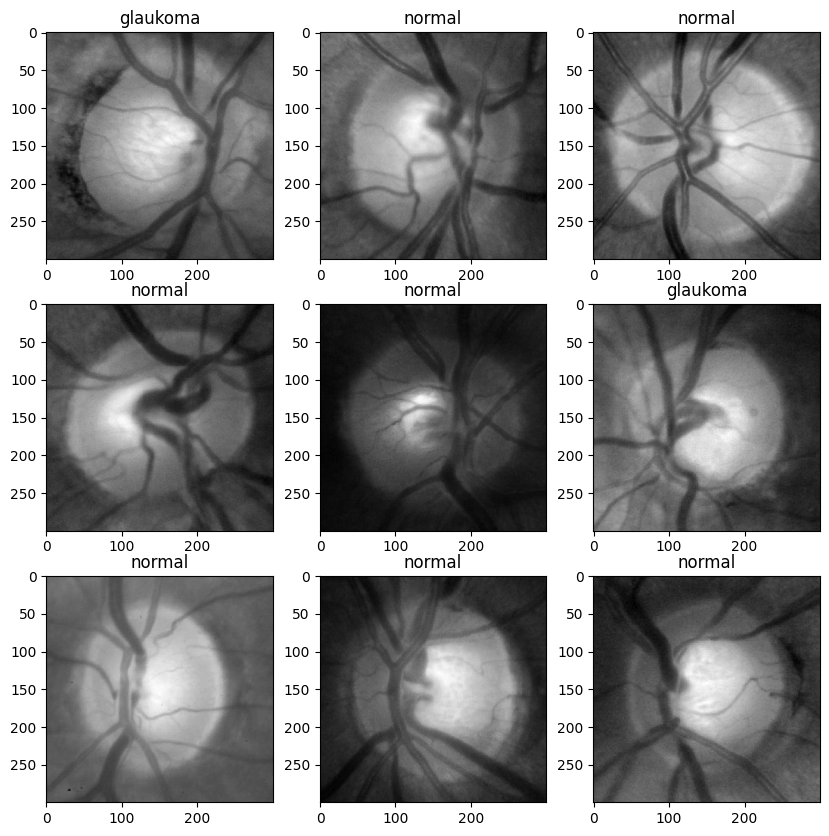

In [ ]:
fig_row = 3
fig_col = 3
position = (s1_rimone_src.batch_index - 1) * s1_rimone_src.batch_size
plt.figure(figsize=(10, 10))
image = next(s1_rimone_src)
for i in range (fig_row * fig_col):
    plt.subplot(fig_row, fig_col, i+1)
    # image = s1_rimone_src.next()
    plt.title(list(s1_rimone_src.class_indices.keys())[int(image[1][i])])
    plt.imshow(image[0][i], cmap='gray')
    # plt.title(list(s1_rimone_src.class_indices.keys())[int(s1_rimone_src[i][1][0])])
    # plt.imshow(s1_rimone_src[i][0][0])
    # plt.axis('off')